In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import boto3
import os
from dotenv import load_dotenv
import warnings 
warnings.filterwarnings('ignore')

### s3 bucket connection

In [2]:
# authentication credentials for AWS account
load_dotenv()
Access_key = os.environ['access_key']
Secret_key = os.environ['secret_key']

In [3]:
# configuration setup
s3_client = boto3.client(
                          's3',
                          aws_access_key_id = Access_key,
                          aws_secret_access_key = Secret_key)

In [4]:
# Load the Data
df = pd.read_csv('Zomato_combined_data.csv')

### Exploratory Data Analysis (EDA)

In [5]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29753 entries, 0 to 29752
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_id         29753 non-null  int64  
 1   Restaurant_name       29753 non-null  object 
 2   Country_code          29753 non-null  int64  
 3   City                  29753 non-null  object 
 4   Address               29753 non-null  object 
 5   Locality              29753 non-null  object 
 6   Locality_Verbose      29753 non-null  object 
 7   Longitude             29753 non-null  float64
 8   Latitude              29753 non-null  float64
 9   Cuisines              29563 non-null  object 
 10  Average_Cost_for_two  29753 non-null  int64  
 11  Currency              29733 non-null  object 
 12  Has_Table_Booking     29753 non-null  int64  
 13  Has_Online_delivery   29753 non-null  int64  
 14  Is_delivering_now     29753 non-null  int64  
 15  Switch_to_order_men

In [6]:
# Get statistical summaries of numerical columns
df.describe()

,Restaurant_id,Country_code,Longitude,Latitude,Average_Cost_for_two,Has_Table_Booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Votes
count,2.975300e+04,29753.000000,29753.000000,29753.000000,29753.00000,29753.000000,29753.000000,29753.000000,29753.0,29753.000000,29753.000000,29753.000000
mean,1.035475e+07,32.271401,63.466626,19.114803,2544.60888,0.144221,0.192115,0.001949,0.0,2.183444,3.325201,522.612274
std,8.534506e+06,69.626147,68.264524,23.496187,18230.51240,0.351319,0.393970,0.044110,0.0,0.954264,1.270941,948.450729
min,4.000000e+00,1.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
25%,3.064070e+05,1.000000,77.088328,23.044337,50.00000,0.000000,0.000000,0.000000,0.0,1.000000,3.100000,19.000000
50%,1.660886e+07,1.000000,77.219739,28.567720,450.00000,0.000000,0.000000,0.000000,0.0,2.000000,3.700000,89.000000
75%,1.824528e+07,14.000000,77.363084,28.642216,1000.00000,0.000000,0.000000,0.000000,0.0,3.000000,4.100000,542.000000
max,1.850065e+07,216.000000,174.832089,73.990000,800000.00000,1.000000,1.000000,1.000000,0.0,4.000000,4.900000,10934.000000


In [7]:
# statistical view of the categorical data 
df.describe(include="object")

,Restaurant_name,City,Address,Locality,Locality_Verbose,Cuisines,Currency,Rating_color,Rating_text
count,29753,29753,29753,29753,29753,29563,29733,29753,29753
unique,7469,142,8944,1221,1281,1834,12,8,6
top,Barbeque Nation,New Delhi,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Connaught Place,"Connaught Place, New Delhi",North Indian,Rs.,5BA829,Very Good
freq,419,12362,337,1549,1549,1963,20503,8353,8353


In [8]:
# Display the first few rows of the DataFrame
df.head()

,Restaurant_id,Restaurant_name,Country_code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_Booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,308322,Hauz Khas Social,1,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,"Hauz Khas Village, New Delhi",77.194471,28.554285,"Continental, American, Asian, North Indian",...,Rs.,1,1,0,0,3,4.3,5BA829,Very Good,7931
1,18037817,Qubitos - The Terrace Cafe,1,New Delhi,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,"Rajouri Garden, New Delhi",77.117701,28.647133,"Thai, European, Mexican, North Indian, Chinese...",...,Rs.,1,0,0,0,3,4.5,3F7E00,Excellent,778
2,312345,The Hudson Cafe,1,New Delhi,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204317,28.694947,"Cafe, Italian, Continental, Chinese",...,Rs.,0,1,0,0,2,4.4,5BA829,Very Good,1537
3,307490,Summer House Cafe,1,New Delhi,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,"Hauz Khas, New Delhi",77.203809,28.552520,"Italian, Continental",...,Rs.,1,0,0,0,3,4.1,5BA829,Very Good,1823
4,18241537,38 Barracks,1,New Delhi,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222858,28.633025,"North Indian, Italian, Asian, American",...,Rs.,1,0,0,0,3,4.4,5BA829,Very Good,840


### Handling Missing Values

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Restaurant_id             0
Restaurant_name           0
Country_code              0
City                      0
Address                   0
Locality                  0
Locality_Verbose          0
Longitude                 0
Latitude                  0
Cuisines                190
Average_Cost_for_two      0
Currency                 20
Has_Table_Booking         0
Has_Online_delivery       0
Is_delivering_now         0
Switch_to_order_menu      0
Price_range               0
Aggregate_rating          0
Rating_color              0
Rating_text               0
Votes                     0
dtype: int64

In [10]:
# replace nan values with cuisine name
df.loc[df['Restaurant_name']=='HI Lite Bar & Lounge','Cuisines'] = 'Bar'
df.loc[df['Restaurant_name']=='Hillstone','Cuisines'] = 'Thai'
df.loc[df['Restaurant_name']=="Jimmie's Hot Dogs",'Cuisines'] = 'Hot dogs'
df.loc[df['Restaurant_name']=="Pearly's Famous Country Cookng",'Cuisines'] = 'American'
df.loc[df['Restaurant_name']=='Cookie Shoppe','Cuisines'] = 'Cookies'
df.loc[df['Restaurant_name']=='Corkscrew Cafe','Cuisines'] = 'Cafe'
df.loc[df['Restaurant_name']=='Tybee Island Social Club','Cuisines'] = 'Coastal'
df.loc[df['Restaurant_name']=='Dovetail','Cuisines'] = 'Cocktails '
df.loc[df['Restaurant_name']=="Leonard's Bakery",'Cuisines'] = 'Bakery'

In [11]:
# Fill missing values with forward fill
df.fillna(method='ffill', inplace=True)

In [12]:
df

,Restaurant_id,Restaurant_name,Country_code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_Booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,308322,Hauz Khas Social,1,New Delhi,"9-A & 12, Hauz Khas Village, New Delhi",Hauz Khas Village,"Hauz Khas Village, New Delhi",77.194471,28.554285,"Continental, American, Asian, North Indian",...,Rs.,1,1,0,0,3,4.3,5BA829,Very Good,7931
1,18037817,Qubitos - The Terrace Cafe,1,New Delhi,"C-7, Vishal Enclave, Opposite Metro Pillar 417...",Rajouri Garden,"Rajouri Garden, New Delhi",77.117701,28.647133,"Thai, European, Mexican, North Indian, Chinese...",...,Rs.,1,0,0,0,3,4.5,3F7E00,Excellent,778
2,312345,The Hudson Cafe,1,New Delhi,"2524, 1st Floor, Hudson Lane, Delhi University...",Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.204317,28.694947,"Cafe, Italian, Continental, Chinese",...,Rs.,0,1,0,0,2,4.4,5BA829,Very Good,1537
3,307490,Summer House Cafe,1,New Delhi,"1st Floor, DDA Shopping Complex, Aurobindo Pla...",Hauz Khas,"Hauz Khas, New Delhi",77.203809,28.552520,"Italian, Continental",...,Rs.,1,0,0,0,3,4.1,5BA829,Very Good,1823
4,18241537,38 Barracks,1,New Delhi,"M-38, Outer Circle, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.222858,28.633025,"North Indian, Italian, Asian, American",...,Rs.,1,0,0,0,3,4.4,5BA829,Very Good,840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,216,Pocatello,"961 Hiline Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.443300,42.894200,Mexican,...,$,0,0,0,0,1,3.6,9ACD32,Good,108
29749,17582625,Sandpiper Restaurant & Lounge,216,Pocatello,"1400 Bench Rd, Pocatello, ID 83201",Pocatello,"Pocatello, Pocatello",-112.432000,42.901200,"American, Seafood, Steak",...,$,0,0,0,0,3,3.6,9ACD32,Good,85
29750,17582668,Texas Roadhouse,216,Pocatello,"560 Bullock Street, Pocatello, ID 83202",Chubbuck,"Chubbuck, Pocatello",-112.461326,42.910518,"American, BBQ, Steak",...,$,0,0,0,0,3,3.5,9ACD32,Good,83
29751,17582498,Riverwalk Cafe,216,Pocatello,"695 E Main St, Lava Hot Springs, ID 83246",Lava Hot Springs,"Lava Hot Springs, Pocatello",-112.013200,42.620000,"Asian, Thai",...,$,0,0,0,0,1,3.6,9ACD32,Good,91


In [13]:
# Filtering Irrelevant Columns
# Drop irrelevant columns
df.drop(columns=['Locality', 'Locality_Verbose', 'Rating_color', 'Rating_text'], inplace=True)

## Data Visualization

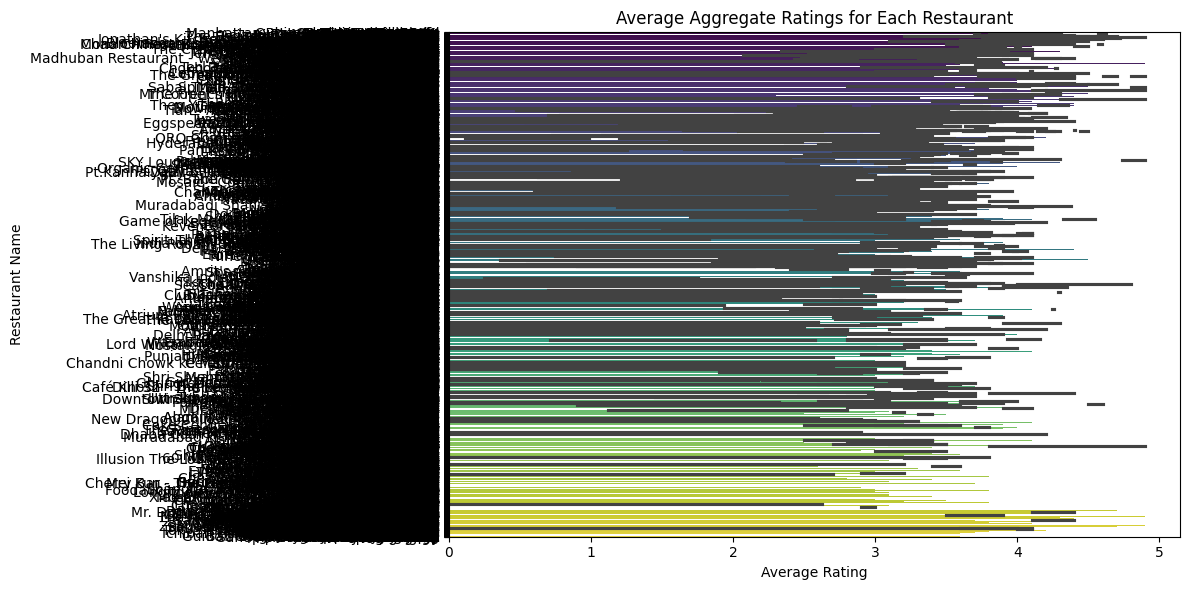

In [14]:
# 1. Average Aggregate Ratings for Each Restaurant
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate_rating', y='Restaurant_name', data=df, palette='viridis')
plt.title('Average Aggregate Ratings for Each Restaurant')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

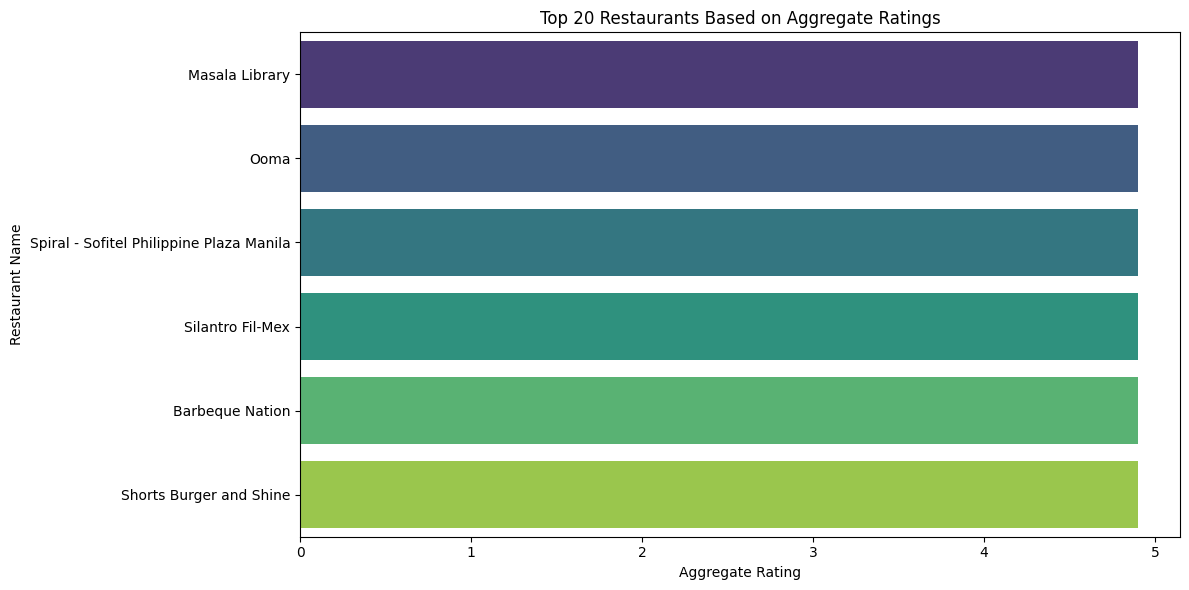

In [15]:
# 2. Aggregate Ratings for the Top 20 Restaurants
top_20_restaurants = df.sort_values(by='Aggregate_rating', ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate_rating', y='Restaurant_name', data=top_20_restaurants, palette='viridis')
plt.title('Top 20 Restaurants Based on Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.tight_layout()
plt.show()

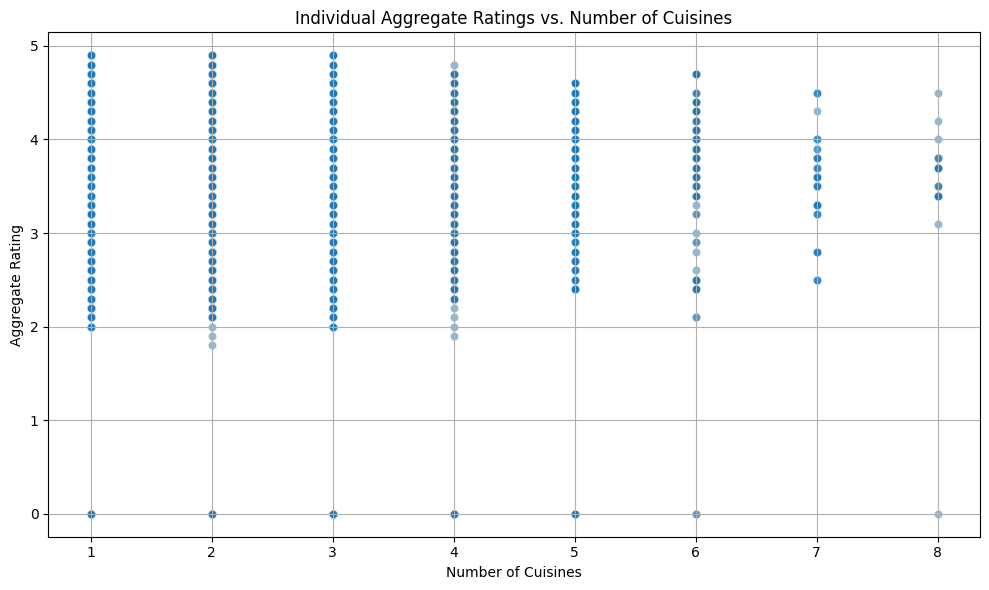

In [16]:
# 3. Scatter Plot: Individual Aggregate Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Cuisines'].str.split(', ').str.len(), y=df['Aggregate_rating'], alpha=0.5)
plt.title('Individual Aggregate Ratings vs. Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Aggregate Rating')
plt.grid()
plt.tight_layout()
plt.show()

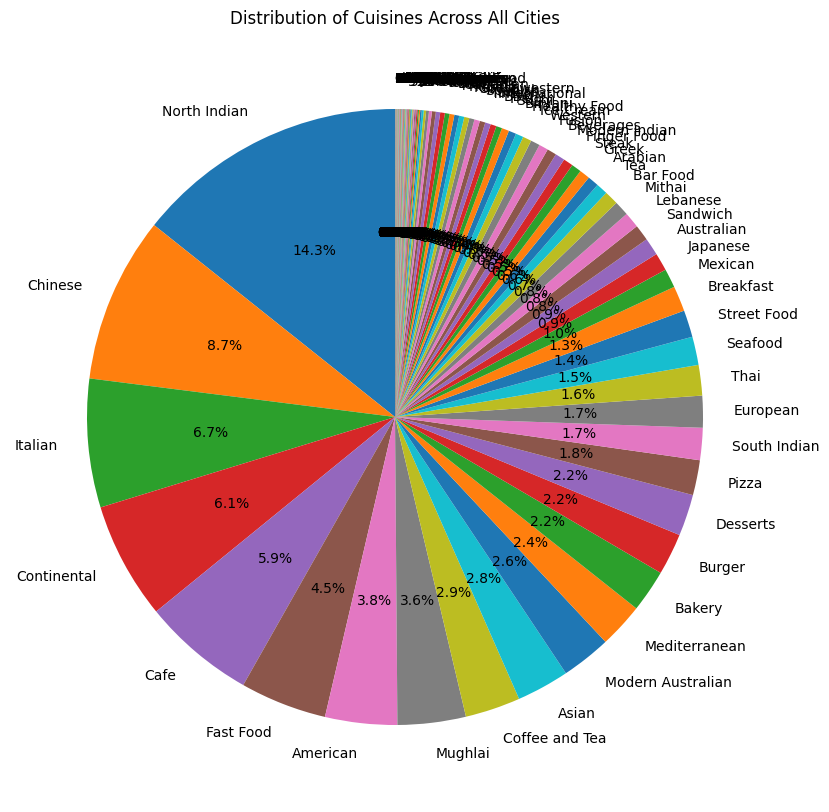

In [17]:
# 4. Pie Chart: Distribution of Cuisines Across All Cities
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
plt.figure(figsize=(10, 10))
cuisine_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cuisines Across All Cities')
plt.ylabel('')
plt.show()

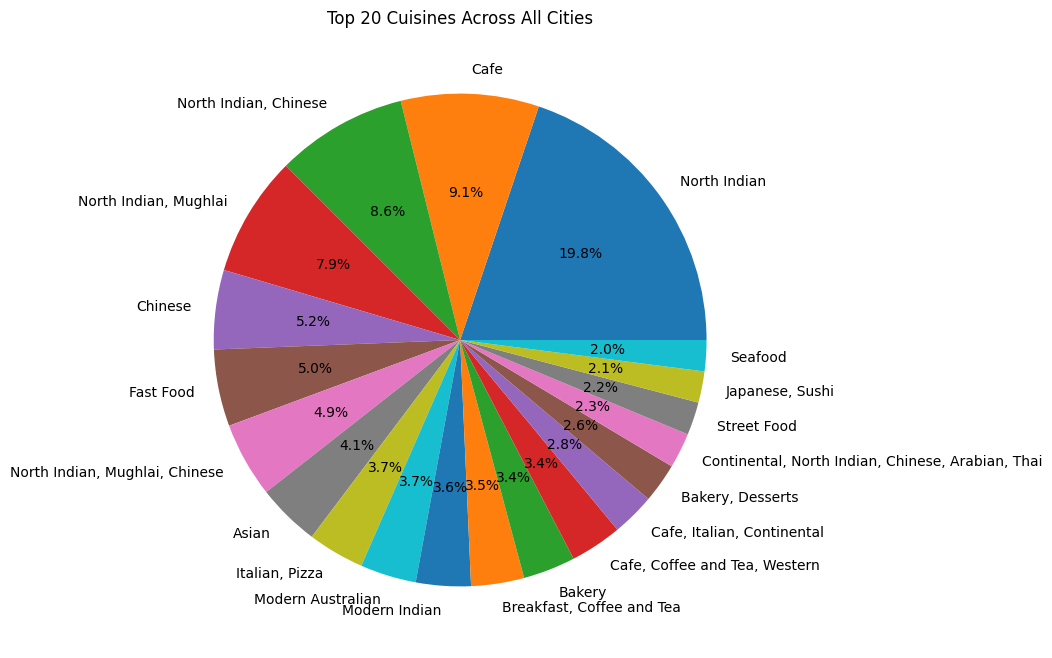

In [18]:
# Select top 20 cuisines
top_cuisines = df['Cuisines'].value_counts().head(20)

# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(top_cuisines, labels=top_cuisines.index, autopct='%1.1f%%')
plt.title('Top 20 Cuisines Across All Cities')
plt.show()

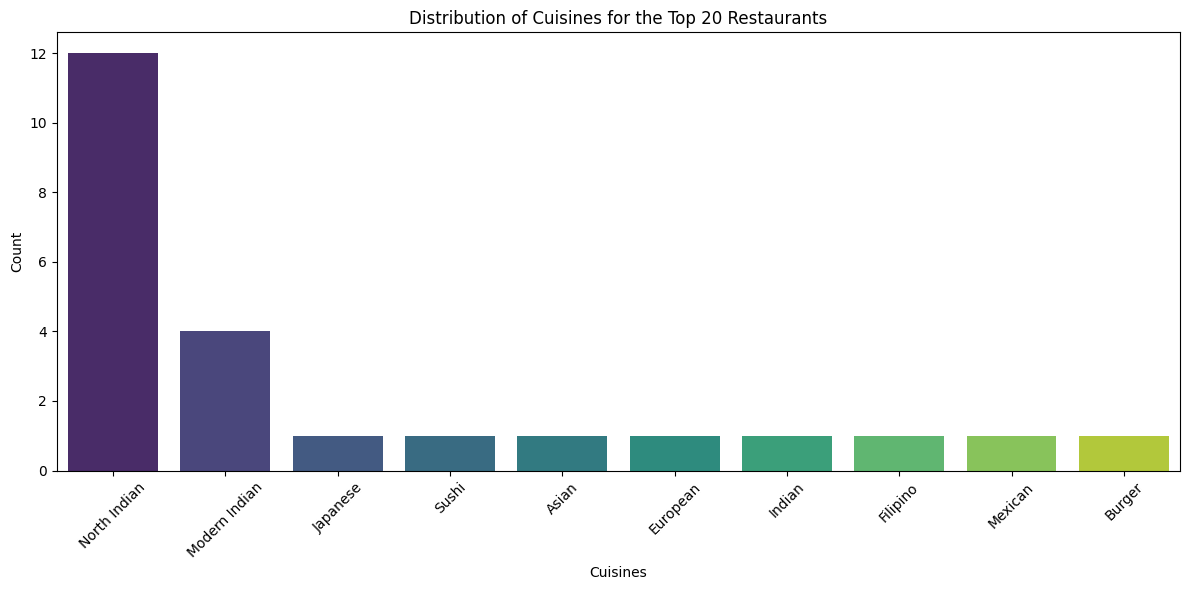

In [19]:
# 5. Bar Chart: Distribution of Cuisines for the Top 20 Restaurants
top_20_cuisines = top_20_restaurants['Cuisines'].str.split(', ').explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_cuisines.index, y=top_20_cuisines.values, palette='viridis')
plt.title('Distribution of Cuisines for the Top 20 Restaurants')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df["Cuisines"].unique()

array(['Continental, American, Asian, North Indian',
       'Thai, European, Mexican, North Indian, Chinese, Cafe',
       'Cafe, Italian, Continental, Chinese', ..., 'Indian, Persian',
       'Desserts, Thai', 'American, Greek'], dtype=object)

In [21]:
df["Cuisines"].value_counts()

Cuisines
North Indian                         1963
Cafe                                  896
North Indian, Chinese                 854
North Indian, Mughlai                 783
Chinese                               515
                                     ... 
Indian, International, Vegetarian       1
Asian, Sushi, Vegetarian                1
Indian, Persian                         1
Desserts, Thai                          1
Caribbean, Mexican, Cajun               1
Name: count, Length: 1839, dtype: int64

In [22]:
# Split the cuisines into individual categories
cuisines_series = df['Cuisines'].str.split(', ')
cuisines_flat = cuisines_series.explode()  # Flatten the list of cuisines

In [23]:
# Count the occurrences of each cuisine category
cuisine_counts = cuisines_flat.value_counts()

In [24]:
# Limit to top N categories (e.g., top 20)
top_n = 20
top_cuisines = cuisine_counts.head(top_n)

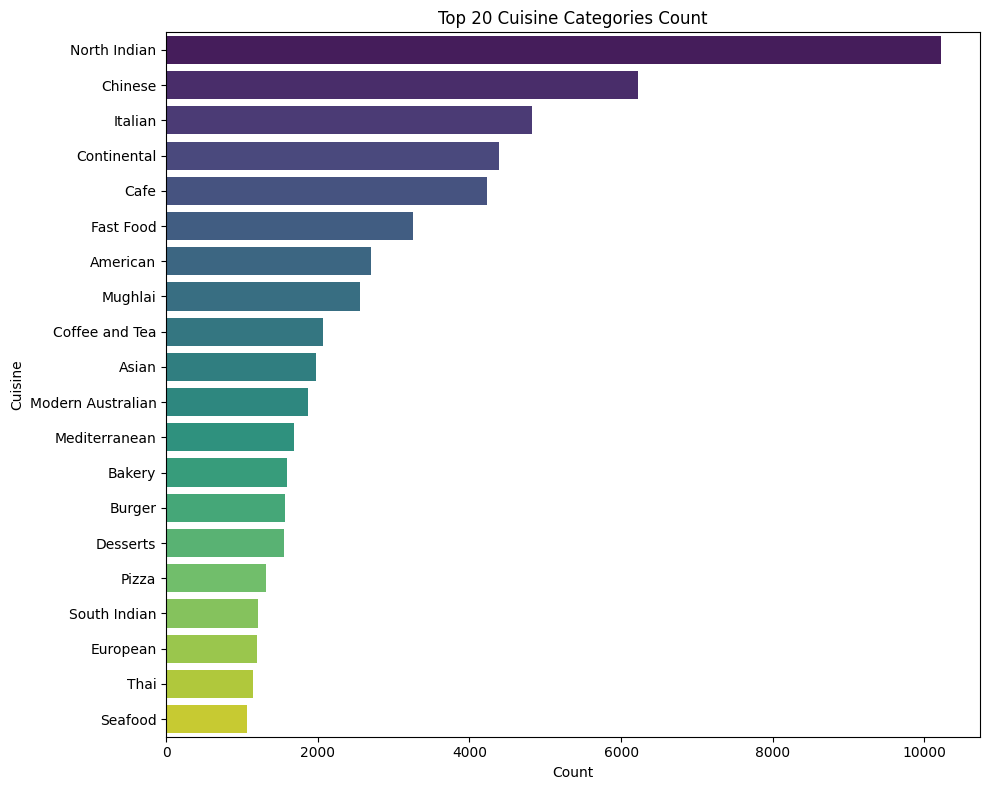

In [25]:
# Plot the results as a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title(f'Top {top_n} Cuisine Categories Count')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.tight_layout()  # Adjust layout
plt.show()

In [26]:
# Sort the DataFrame by 'Aggregate_rating' in descending order
top_restaurants = df.sort_values(by='Aggregate_rating', ascending=False).head(20)

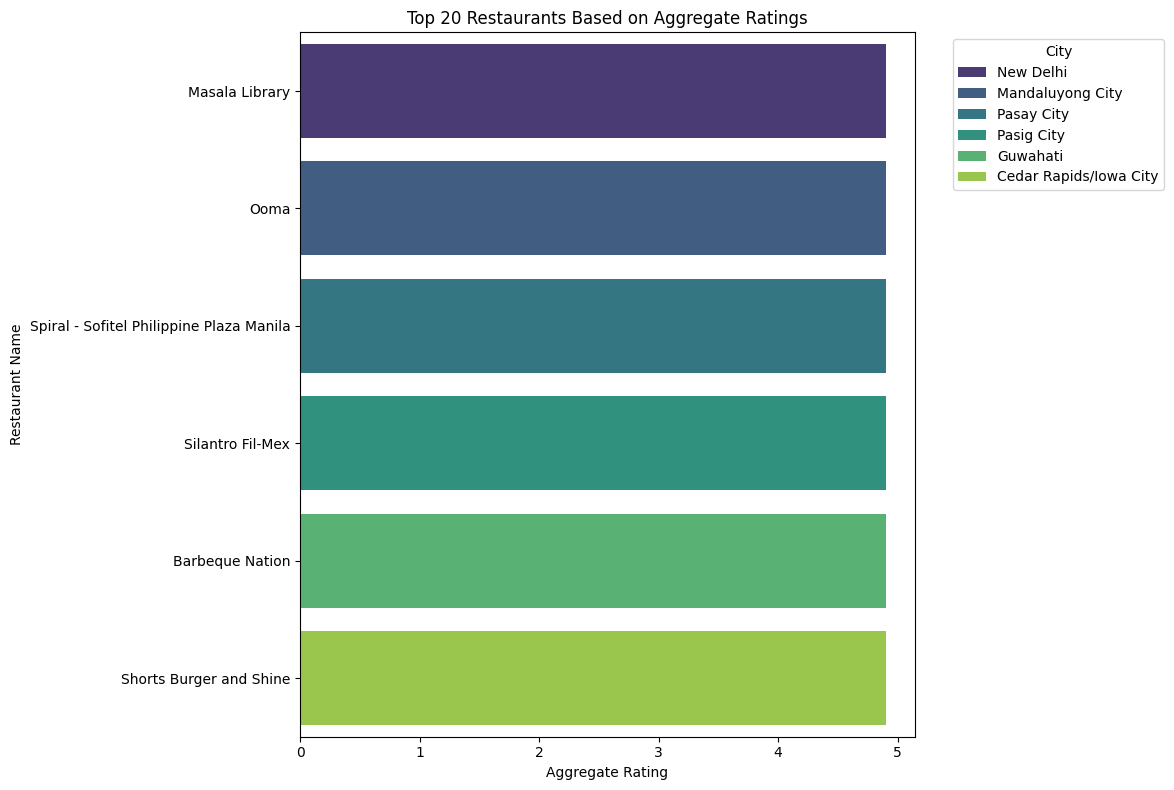

In [27]:
# Create a bar plot for the top 20 restaurants
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate_rating', y='Restaurant_name', data=top_restaurants, palette='viridis', hue='City')
plt.title('Top 20 Restaurants Based on Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Name')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [28]:
# Clean the 'Average_Cost_for_two' column but keep currency
df['Average_Cost_for_two'] = df['Average_Cost_for_two'].replace({',': ''}, regex=True)
df['Average_Cost_for_two'] = pd.to_numeric(df['Average_Cost_for_two'], errors='coerce')

In [29]:
# Group by currency and calculate the average cost for two
average_cost_by_currency = df.groupby('Currency')['Average_Cost_for_two'].mean().reset_index()

In [30]:
average_cost_by_currency

,Currency,Average_Cost_for_two
0,$,27.095080
1,AED,166.416667
2,IDR,157717.086835
3,LKR,2375.000000
4,NZ$,364.000000
5,P,869.791667
6,QR,223.750000
7,R,419.733333
8,R$,134.666667
9,Rs.,913.361459


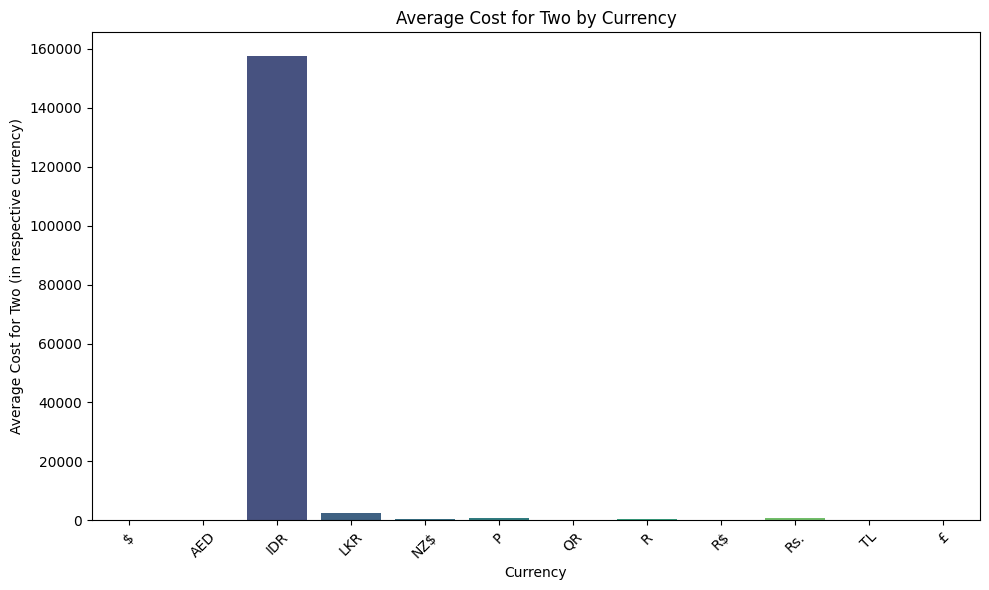

In [31]:
# Visualize the average cost for two by currency using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Currency', y='Average_Cost_for_two', data=average_cost_by_currency, palette='viridis')
plt.title('Average Cost for Two by Currency')
plt.xlabel('Currency')
plt.ylabel('Average Cost for Two (in respective currency)')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

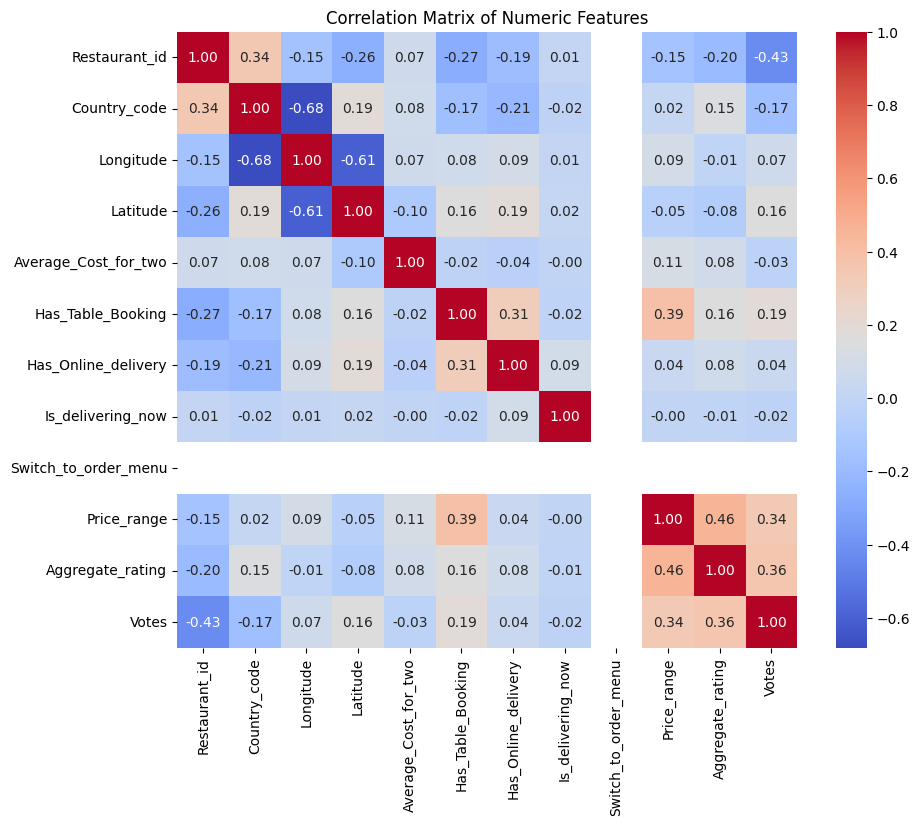

In [32]:
# Select Numeric Columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the Correlation Matrix
correlation_matrix = numeric_df.corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [33]:
# Create the map
fig = px.scatter_geo(df, 
                     lat='Latitude', 
                     lon='Longitude', 
                     hover_name='Restaurant_name', 
                     title='Restaurant Locations',
                     projection='natural earth')  # You can change the projection type if needed

In [34]:
# Show the map
fig.show()

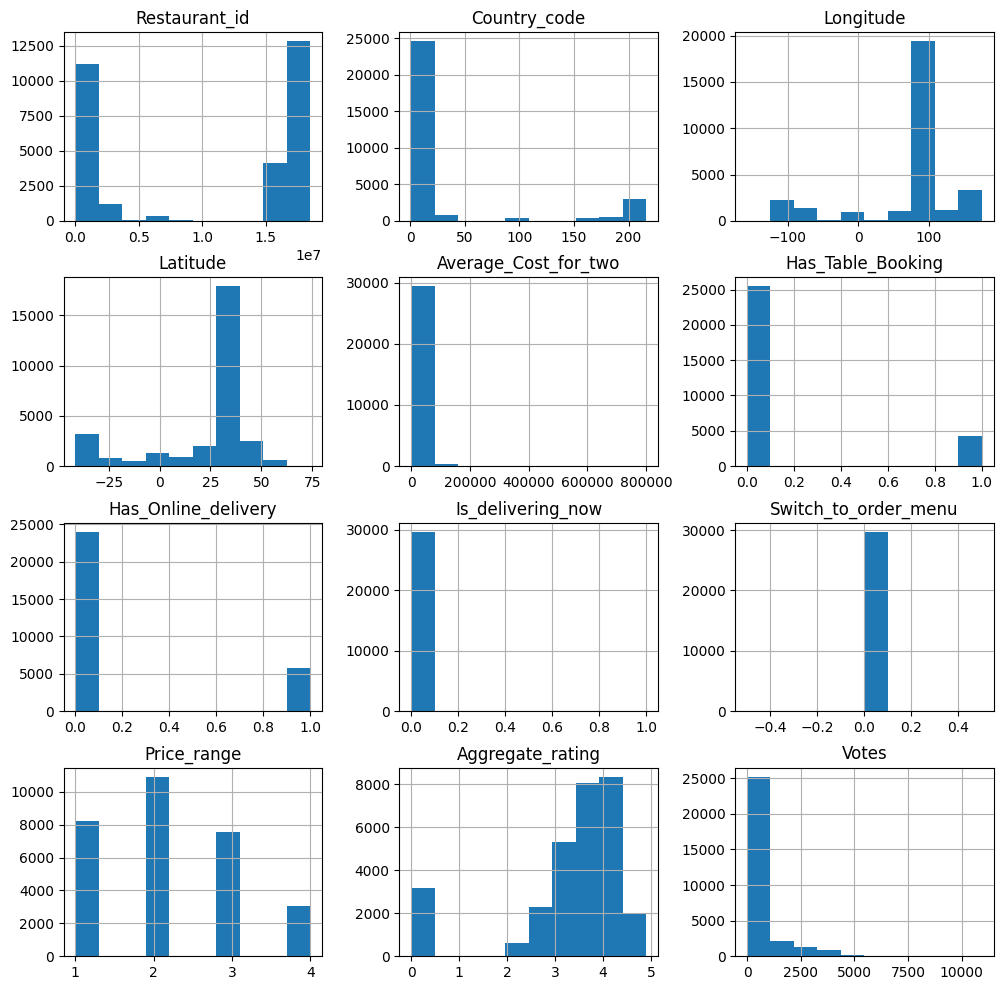

In [35]:
# histogram to visual the data distribution
df.hist(figsize=(12,12))
plt.show()

In [36]:
# Save cleaned df to a CSV file
df.to_csv('Zomato_cleaned_data.csv', index=False)

In [37]:
# upload the cleaned data to s3
file_path = "Zomato_cleaned_data.csv"
s3_client.upload_file(file_path,'chefmatebucket','datas/Zomato_cleaned_data.csv') #folder/filename